!pip3 install jupyterthemes --user

In [216]:
#!pip3 install jupyterthemes --user
#import jupyterthemes as jt
#from jupyterthemes.stylefx import set_nb_theme

#set_nb_theme('chesterish')

In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
#import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

#import misc_util#correlation_plots

import R2h_module
#import imp
#imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

In [2]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

#mixtag='xQ2_'
#dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}


In [3]:
def getdatainChunks(filename,treename):
    import pickle
    with open(filename, 'rb') as f:
        return pickle.load(f)[treename]

In [4]:
%%time
dfs_pair = {}
dfs_trigger = {}
#path_data="/home/sebouh/di-hadron"
#path_data="/home/seba/di-hadron/P27"
path_data="/media/eic_ucr/sebouh/di-hadron/P27"
path_data="/media/miguel/Elements/backup_07-27-23/nvme0n1p2/home/seba/di-hadron/P27/"
path_data="P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair[target]=getdatainChunks(f"data_pion_proton_pairs_{target}.pkl", target)
    dfs_pair['D_%s'%target]= getdatainChunks(f"data_pion_proton_pairs_{target}.pkl", 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    dfs_trigger['%s'%target] = getdatainChunks(f"data_pion_proton_pairs_{target}.pkl", 
                                                      '%s_trigger'%target)
    dfs_trigger['D_%s'%target] = getdatainChunks(f"data_pion_proton_pairs_{target}.pkl", 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C
Get trigger dataframes from deuterium target C
Getting dataframes from target Fe
Get trigger dataframes from deuterium target Fe
Getting dataframes from target Pb
Get trigger dataframes from deuterium target Pb
CPU times: user 22.5 ms, sys: 1.31 s, total: 1.33 s
Wall time: 1.34 s


(array([ 91., 161., 233., 258., 319., 353., 372., 381., 429., 415., 482.,
        443., 454., 502., 494., 530., 460., 528., 537., 482., 571., 574.,
        528., 531., 542., 549., 516., 560., 489., 517., 486., 551., 508.,
        491., 495., 429., 443., 448., 380., 383., 384., 342., 361., 336.,
        315., 300., 286., 269., 226., 257., 224., 208., 221., 209., 168.,
        178., 164., 110., 136.,  98., 103., 112.,  80.,  74.,  73.,  58.,
         55.,  57.,  32.,  37.,  35.,  35.,  29.,  25.,  17.,  11.,  20.,
          9.,   4.,  11.,   6.,   7.,   4.,   5.,   3.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.25164958, 0.27792538, 0.30420119, 0.33047699, 0.35675279,
        0.38302859, 0.4093044 , 0.4355802 , 0.461856  , 0.48813181,
        0.51440761, 0.54068341, 0.56695921, 0.59323502, 0.61951082,
        0.64578662, 0.67206242, 0.69833823, 0.72461403, 0.75088983,
        0.77716563, 0.80344144, 0.82971724, 0.

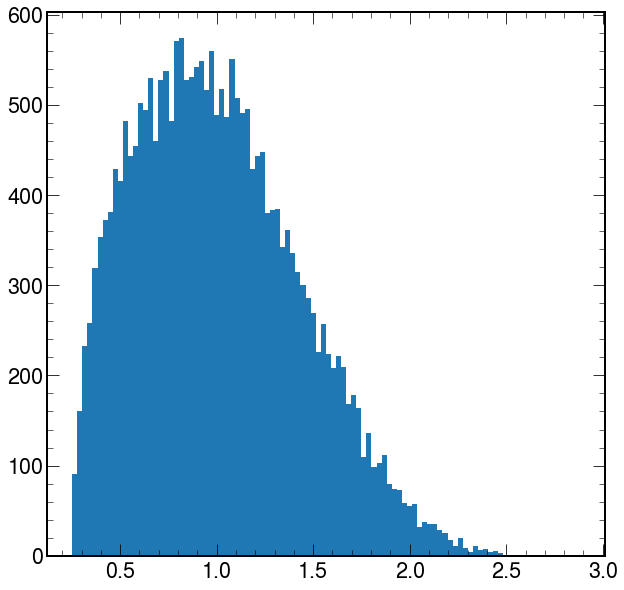

In [5]:
plt.hist(dfs_pair['D_C'].query("h1_cm_pt > 0.25 and h2_cm_pt>0.25").eval("sqrt((h2_z*nu)**2-0.9383**2)"),bins=100)
#plt.yscale("log")

In [6]:
for dct in dfs_pair, dfs_trigger:
    print(dct.keys())
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])

dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb'])


In [7]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True, h2Proton=True)


key:  C
Entries before cut  46028
Q2>1.0 and Q2<4.0 46028  (100.00  %)
0.2<h1_p<5.0  46028  (100.00  %)
inelasticity < 0.85 44727  (97.17  %)
h1_pid = pions (trigger) 44727  (100.00  %)
2.2 < nu <4.2 44044  (98.47  %)
10< h1_th 44044  (100.00  %)
Theta/P fiducial region selected for trigger hadron 44044  (100.00  %)
Nom cuts for the trigger applied 44044  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 44044  (100.00  %)
2.2 < nu < 4.2 44044  (100.00  %)
secondary hadrons are protons 44044  (100.00  %)
leading hadrons are pions 44044  (100.00  %)
0.2<h2_p<5.0 44044  (100.00  %)
0.2<h1_p<5.0 44044  (100.00  %)
10<h2_th 44044  (100.00  %)
Theta/P fiducial region selected for secondary hadron 44044  (100.00  %)
10< h1_th 44044  (100.00  %)
Theta/P fiducial region selected for trigger hadron 44044  (100.00  %)
Nom cuts for the pair applied (pi p) 44044  (100.00  %)

key:  D_C
Entries before cut  37893
Q2>1.0 and Q2<4.0 37893  (100.00  %)
0.2<h1_p<5.0  37893  (1

In [8]:
for key in dfs_trigger.keys():
    isMC = False
      
    print (key, isMC)
    dfs_trigger[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_trigger[key] = r2h.applyCuts(dfs_trigger[key],isTrigger=True, isMC=isMC, nomCuts=True)
    print (' ')
    

C False
Entries before cut  218901
Q2>1.0 and Q2<4.0 218901  (100.00  %)
0.2<h1_p<5.0  218901  (100.00  %)
inelasticity < 0.85 213870  (97.70  %)
h1_pid = pions (trigger) 213870  (100.00  %)
2.2 < nu <4.2 211085  (98.70  %)
10< h1_th 211085  (100.00  %)
Theta/P fiducial region selected for trigger hadron 211085  (100.00  %)
Nom cuts for the trigger applied 211085  (100.00  %)
 
D_C False
Entries before cut  304772
Q2>1.0 and Q2<4.0 304772  (100.00  %)
0.2<h1_p<5.0  304772  (100.00  %)
inelasticity < 0.85 298466  (97.93  %)
h1_pid = pions (trigger) 298466  (100.00  %)
2.2 < nu <4.2 294870  (98.80  %)
10< h1_th 294870  (100.00  %)
Theta/P fiducial region selected for trigger hadron 294870  (100.00  %)
Nom cuts for the trigger applied 294870  (100.00  %)
 
Fe False
Entries before cut  263034
Q2>1.0 and Q2<4.0 263034  (100.00  %)
0.2<h1_p<5.0  263034  (100.00  %)
inelasticity < 0.85 257258  (97.80  %)
h1_pid = pions (trigger) 257258  (100.00  %)
2.2 < nu <4.2 253998  (98.73  %)
10< h1_th 2

In [9]:
set(dfs_pair['D'].h2_pid)


{2212}

In [10]:
# additional cuts that were not applied to the GiBUU set in PRL,
# but we should see what happens if we include them.  
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==2212))'

#pThetaCuts_trig+=" and h1_th>20 and h1_p<2.7"

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_")



In [11]:
#print(<h2_T4)
# https://www.jlab.org/Hall-B/shifts/admin/paper_reviews/2012/TransparencyAnalysisNoteApproved-7233807-2012-10-03-v5.pdf
def poly(a, coeffs):
    ret=0
    for i in range(len(coeffs)):
        ret=ret+coeffs[i]*a**i
    return ret
for df in dfs_pair.values():
    p=df.h2_p#eval("sqrt(h2_E**2-0.09383**2)")
    T4=df.h2_T4
    coeffs_high_range1=120.251,-1168.19,5237.42,-13638.1,22325.3,-23649.6,16177.8,-6894.16,1663.4,-173.474
    coeffs_low_range1=-26.8257,153.155,-408.979,673.476,-790.433,708.255,-474.843,217.295,-58.6269,6.90981
    coeffs_high_range2=1.59223,-1.49056,0.676338,-0.104644
    coeffs_low_range2=-1.1009,0.719988,-0.280016,0.0319352
    df['pass_proton_TOF_cut_nom']=((p>0.2)&(p<0.8)&(T4<poly(p,coeffs_high_range1))&(T4>poly(p,coeffs_low_range1)))|\
                  ((p>=0.8)&(p<2.8)&(T4<poly(p,coeffs_high_range2))&(T4>poly(p,coeffs_low_range2))) 
    df['pass_proton_TOF_cut_tight']=((p>0.2)&(p<0.8)&(T4<0.9*poly(p,coeffs_high_range1))&(T4>0.9*poly(p,coeffs_low_range1)))|\
                  ((p>=0.8)&(p<2.8)&(T4<0.9*poly(p,coeffs_high_range2))&(T4>0.9*poly(p,coeffs_low_range2))) 
    df['pass_proton_TOF_cut_loose']=((p>0.2)&(p<0.8)&(T4<1.1*poly(p,coeffs_high_range1))&(T4>1.1*poly(p,coeffs_low_range1)))|\
                  ((p>=0.8)&(p<2.8)&(T4<1.1*poly(p,coeffs_high_range2))&(T4>1.1*poly(p,coeffs_low_range2))) 
    print(len(df.query('pass_proton_TOF_cut_nom'))/len(df))
    df.eval("h2_p_corr=sqrt((sqrt(h2_p**2+.9383**2)+0.0013+0.00084/(.074+h2_p)**2)**2-.9383**2)", inplace=True)
    df.eval("h2_cm_pt_corr=h2_p_corr/h2_p*h2_cm_pt", inplace=True)
    df.eval("h2_rap_corr=(h2_rap+ycm)/abs(h2_rap+ycm)*0.5*log((sqrt(h2_p_corr**2+.9383**2)+sqrt(h2_p_corr**2-h2_cm_pt_corr**2))/"\
            +"(sqrt(h2_p_corr**2+.9383**2)-sqrt(h2_p_corr**2-h2_cm_pt_corr**2)))-ycm",inplace=True)
    df.eval("drap_corr=drap+h2_rap-h2_rap_corr", inplace=True)

ecorr_pars={"C":[0.00205, 0.000217, 0.0913],
    "Fe": [0.00205, 0.000218, 0.0911],
    "Pb": [0.00205, 0.000218, 0.0912],
    "D": [0.00208, 0.000255, 0.0886]}
for a in "D C Fe Pb".split():
    df = dfs_pair[a]
    #print(len(df.query('pass_proton_TOF_cut'))/len(df))

    #Or Hen had .0013, .00084,.074
    df.eval(f"h2_p_corr=sqrt((sqrt(h2_p**2+.9383**2)+{ecorr_pars[a][0]}+{ecorr_pars[a][1]}/({ecorr_pars[a][2]}+h2_p)**2)**2-.9383**2)", inplace=True)
    df.eval("h2_cm_pt_corr=h2_p_corr/h2_p*h2_cm_pt", inplace=True)
    df.eval("h2_rap_corr=(h2_rap+ycm)/abs(h2_rap+ycm)*0.5*log((sqrt(h2_p_corr**2+.9383**2)+sqrt(h2_p_corr**2-h2_cm_pt_corr**2))/"\
            +"(sqrt(h2_p_corr**2+.9383**2)-sqrt(h2_p_corr**2-h2_cm_pt_corr**2)))-ycm",inplace=True)
    df.eval("drap_corr=drap+h2_rap-h2_rap_corr", inplace=True)
    

0.9646716919444193
0.9569410859529567
0.968310226206609
0.9556853624677736
0.9688627223350885
0.9560483941772463
0.9561313907854416


In [207]:
import copy
def apply_endcap_corrections(data):
    yD = data['D']['C']
    dyD = data['D']['dCstat']
    yC = data['C']['C']
    dyC = data['C']['dCstat']
    yFe = data['Fe']['C']
    dyFe = data['Fe']['dCstat']

    dx =  data['Fe']['phi'][1]-data['Fe']['phi'][0]
    
    # fraction of the events in the deuterium set that are actually from the endcaps
    # determined from Taisiya's note
    fAl=(len(dfs_pair['D_C'])*3.15+len(dfs_pair['D_Fe'])*2.37+len(dfs_pair['D_Fe'])*2.27)\
        /((len(dfs_pair['D_C'])+len(dfs_pair['D_Fe'])+len(dfs_pair['D_Fe']))*100)

    
    #yC*=sum(yD)/sum(yC)
    #yFe*=sum(yD)/sum(yFe)
    
    # use corrections assuming C(Al) is halfway between C(C) and C(Fe)
    yAl = (yC+yFe)/2
    
    # normalize this to the deuterium 
    #yAl *= sum(yD)/sum(yAl)
    
    # uncertainty from the stat uncertainty on the Al interpolation, 
    # and also from the interpolation itself
    dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
    yDcorr = (yD-fAl*yAl)
    dyDcorr= fAl*dyAl
    

    newIntegral =2*dx*sum(yDcorr)
    
    dnewIntegral=2*dx*fAl*np.sqrt(sum(dyAl))
    print("dnewIntegral=", dnewIntegral)
    
    #print(f"EC correction: normalization effect:  {newIntegral}")
    #dyDcorr/=newIntegral
    #yDcorr/=newIntegral 
    
    data_corr = copy.deepcopy(data)
    data_corr['D']['C']=yDcorr
    data_corr['D']['dCsyst']=np.hypot(data_corr['D']['dCsyst'], dyDcorr)
    
    data_corr['D']['dCsyst_EC'] = dyDcorr
    
    for A in "C Fe Pb".split():
        
        data_corr[A]['R']/=yDcorr/yD
        data_corr[A]['dRstat']/=yDcorr/yD
        data_corr[A]['dRsyst_EC']=data_corr[A]['R']*np.hypot(dyDcorr/yDcorr, dnewIntegral)
        data_corr[A]['dRsyst']= np.hypot(data_corr[A]['dRsyst'],data_corr[A]['dRsyst_EC'])
        
    data_corr['D']['C_correction_EC'] = yDcorr-yD
    
    #data_corr['C']['C']/=newIntegral
    #data_corr['Fe']['C']/=newIntegral
    #data_corr['Pb']['C']/=newIntegral
    
    #data_corr['C']['R']/=newIntegral
    #data_corr['Fe']['R']/=newIntegral
    #data_corr['Pb']['R']/=newIntegral
    
    # to determine the systematic effect on the width,
    # first calculate the corrected value assuming C_Al=C_C,
    # and then do the same assuming C_Al=C_Fe, and then take half the difference
    yDcorr_C = (yD-fAl*yC)/(2*dx*sum(yD-fAl*yC))
    yDcorr_Fe = (yD-fAl*yFe)/(2*dx*sum(yD-fAl*yFe))
    
    x=data['Fe']['phi']-np.pi
    sigmaD_C=np.sqrt(sum(yDcorr_C*x*x)/sum(yDcorr_C))
    sigmaD_Fe=np.sqrt(sum(yDcorr_Fe*x*x)/sum(yDcorr_Fe))
    data_corr['D_dwidth_syst_EC']=(sigmaD_C-sigmaD_Fe)/2
    sigmaDcorr=np.sqrt(sum(yDcorr*x*x)/sum(yDcorr))
    data_corr['D_width']=sigmaDcorr
    
    for A in "D C Fe Pb".split():
        dCstat=data_corr[A]['dCstat']
        C=data_corr[A]['C']
        sigma=np.sqrt(sum(C*x*x)/sum(C))
        data_corr[f'{A}_width']=sigma
        data_corr[f'{A}_dwidth_stat']=\
            np.sqrt(sum(dCstat**2*((x**2-sigma**2)/sum(C))**2))/(2*sigma)
    for A in "C Fe Pb".split():
        #data_corr[A]['dCsyst_EC'] = 0
        data_corr[A]['dCsyst_EC']=data_corr[A]['C']*dnewIntegral
        data_corr[A]['dCsyst']=np.hypot(data_corr[A]['dCsyst_EC'],data_corr[A]['dCsyst'])
        data_corr[f'{A}_dwidth_syst_EC']=0
        sigmaA=data_corr[f'{A}_width']
        b=np.sqrt(sigmaA**2-sigmaDcorr**2)
        data_corr[f'{A}_dbroad_syst_EC']=data_corr['D_dwidth_syst_EC']*sigmaDcorr/b
        data_corr[f'{A}_broad']=b
        data_corr[f'{A}_dbroad_stat']=np.hypot(sigmaA*data_corr[f'{A}_dwidth_stat'],\
                                              sigmaDcorr*data_corr[f'D_dwidth_stat'])/b
            
    #print("systematic error on width from endcap:", data_corr['D_dwidth_syst_EC']\
    #      /((sigmaD_C+sigmaD_Fe)/2))
    
    return data_corr

In [13]:
def get_values(slicevar='drap-ycm', slicevartex='\Delta Y^*', slicebins=(-1,-0.5,0, 0.5, 1,1.5,2),  
               pMin=.2, pT1min=.07, pT2min=.07,
               suptitle=None,nbins_data=8,
              addCuts=None, addCutsTrig=None, sliceNh=False, tofCutTightness="nom"):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    data=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not inves
    systPct=0
    pid=211
    
    integral_data_D = 0
    for k in range(len(slicebins)-1):
        data.append({})
        slice_range=slicebins[k:k+2]

        data_D=None
        stat_D=None
        Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}   and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt_corr > {pT2min} and h1_z>0.5 and h2_pid==2212 and h2_p_corr>{pMin} and pass_proton_TOF_cut_{tofCutTightness}"
            
            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCuts is not None:
                q+= f" and {addCuts}"

            which_set=A

            bins = np.linspace(0,np.pi,nbins_data+1)

            N2, x = np.histogram(dfs_pair[A].query(q)['dphi'], bins=bins)
            
            
            qtrig = pThetaCuts_trig+f" and h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            
            if sliceNh:
                qtrig+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCutsTrig is not None:
                qtrig += f" and {addCutsTrig}"
            
            N1 = len(dfs_trigger[A].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            C=S
            dCstat = dSstat
            


            if A=="D":  
                integral_data_D+=sum(C)*dx*2*(slice_range[1]-slice_range[0])

            dCsyst = C*systPct/100

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, dSstat=dSstat,
                                                R=R_data,
                                                dRstat=dR_data_stat, dRsyst=R_data*0.0,
                                        N2h=N2, N1=[N1]*len(N2)))
            data[k][A+"_N1"] = N1
            if "D_" in A:
                continue
        
        
        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.1f} < ${slicevartex}$< {slice_range[1]:.1f}"
            
        else :
            sliceinfo[k] = f""
    #for A in "D C Fe Pb".split():
    #    for k in range(len(slicebins)-1):
    #        data[k][A]['C']/=integral_data_D
    #        data[k][A]['dCstat']/=integral_data_D
    #        data[k][A]['dCsyst']/=integral_data_D
    #data=[apply_endcap_corrections(d) for d in data]
    return data, None, sliceinfo

In [14]:
def dev_check(tag,d, dd, thresh=0.3):
    if np.max(d/dd)>thresh:
        print(f"large deviation in {tag}; z={max(d/dd)}")
    

In [165]:
from scipy.interpolate import make_interp_spline
def make_diff_plots(nom, alt, sliceinfo, pMin=.35, pT1min=.07, pT2min=.07, filename_tag=None,
                  slice_unit=None, useSpline=False, predictionStats=True, prediction_name="prediction", ymax=None,
                  legend_panel=0, suptitle=None, tag=None, syst=[0,0,0,0,0.03, 0.07]):
    
    axs= {}

    slicevartex = sliceinfo[0].split("<")[1].replace("$","") if len(sliceinfo[0]) != 0 else None
    s=(', '+slicevartex) if slicevartex!=None else ''
    #ylabels = {"C":f"$C(\Delta\phi{s})$",
    ylabels = {"C":f"$\\Delta C/C$",
               "M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$\\Delta R/R$"
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    #set up panels in figures
    keys= "CR"

    height = 18*len(sliceinfo)/4
    if len(sliceinfo) == 1:
        height = 7
    width = 16 
    
    # one figure with the S and M plots (for the supplementary)
    # the other is the C and R plots
    if len(sliceinfo) == 1:
        #figs["SM"], (axs["S"],axs["M"]) = plt.subplots(len(sliceinfo), 2, 
        #       figsize=(width,height),sharey='col', sharex='all')
        fig, (axs["C"],axs["R"]) = plt.subplots(2,1, 
               figsize=(8,7*1.25),sharey='row', sharex='all', 
                                                       gridspec_kw=dict(height_ratios=(10,2.5)))
                                                         
        for key in keys:
            axs[key] = [axs[key]]
    else:
        #figs["SM"], ax = plt.subplots(len(sliceinfo), 2, 
        #       figsize=(width,height),sharey='col', sharex='all')
        #axs["S"] = [ax[k][0] for k in range(len(ax))]
        #axs["M"] = [ax[k][1] for k in range(len(ax))]
        fig, ax = plt.subplots(2,len(sliceinfo), 
               figsize=(16,7*1.5), sharex='all', sharey='row',
                                     gridspec_kw=dict(height_ratios=[10,5]))  
        axs["C"] = [ax[0][k] for k in range(len(sliceinfo))]
        axs["R"] = [ax[1][k] for k in range(len(sliceinfo))]
    
    artists = []
    maxC=0.05
    maxR=0.05
    fontsize=18
    for ax in axs['C']+axs['R']:
        ax.tick_params(axis='both', labelsize=fontsize)
    for k in range(len(sliceinfo)):
        
        for key in "CR":    
            #if (key in "SM" and k == len(sliceinfo)-1) or key == "R":
            #    axs[key][k].set_xlabel("$\\Delta\phi$ [rad]", fontsize=fontsize)
            axs[key][0].set_ylabel(ylabels[key], fontsize=fontsize)
        linestyles='- -- : -. --'.split()
        colors='tab:red tab:blue tab:orange tab:green k'.split()
        markers='*vos*'
        
        Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            
            #which_set=A
            x= np.array(nom[k][A].phi)
            shift = 0.07*(x[2]-x[1])*(i-1.5)
            
            #S = data[k][A].S
            #M = data[k][A].M
            def dev(nom,alt):
                return (alt-nom)/nom
            def ddev(nom,alt, dnom, dalt):
                return alt/nom*np.hypot(dnom/nom, dalt/alt)
            
            devC = dev(nom[k][A].C,alt[k][A].C)
            devR = dev(nom[k][A].R, alt[k][A].R)
            #dSstat = data[k][A].dSstat
            #dMstat = data[k][A].dMstat
            ddevCstat = ddev(nom[k][A].C,alt[k][A].C, nom[k][A].dCstat, alt[k][A].dCstat)
            ddevRstat = ddev(nom[k][A].R,alt[k][A].R, nom[k][A].dRstat, alt[k][A].dRstat)

            dev_check(f"corr target {A} bin {k}",devC, ddevCstat)
            dev_check(f"ratio target {A} bin {k}",devR, ddevRstat)
            
            arg = dict(color=colors[i], marker=markers[i], linestyle='-',
                      capsize=3, ms=4)

            #axs['S'][k].errorbar(x+shift, S,dSstat, **arg, label=A)
            #axs['S'][k].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

            #axs['M'][k].errorbar(x+shift, M,dMstat, **arg, label=A)
            #axs['M'][k].errorbar(2*np.pi-x+shift, M, dMstat, **arg)


    
            #artists.append(axs['C'][k].errorbar(x+shift, devC,ddevCstat, **arg, label=A))
            #axs['C'][k].errorbar(2*np.pi-x-shift, devC, ddevCstat, **arg)
            #mirror 
            #x=np.concatenate([x, (2*np.pi-x)[::-1]])
            #devC=np.concatenate([devC, devC[::-1]])
            #ddevCstat=np.concatenate([ddevCstat, ddevCstat[::-1]])
            #devR=np.concatenate([devR, devR[::-1]])
            #ddevRstat=np.concatenate([ddevRstat, ddevRstat[::-1]])
            
            artists.append(axs['C'][k].errorbar(x, devC, **arg, label=A))
            axs['C'][k].plot(x, np.array(devC+ ddevCstat), color=colors[i],linestyle=':')
            axs['C'][k].plot(x, np.array(devC- ddevCstat), color=colors[i],linestyle=':')
            
            
            arg['capsize']=0
            
            if A!="D":
                axs['R'][k].errorbar(x, devR, **arg)
                axs['R'][k].plot(x, np.array(devR+ ddevRstat), color=colors[i],linestyle=':')
                axs['R'][k].plot(x, np.array(devR- ddevRstat), color=colors[i],linestyle=':')
                
        Alist = enumerate("D C Fe Pb".split())
        
        for key in keys:
            cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      "$p_{p,\pi^+}^T>250$ MeV\n"+\
                      "$P_p$>400 MeV"
            
            if len(sliceinfo)!=1 and key == "C": 
                axs[key][k].set_title(sliceinfo[k].replace("-", "$-$") + \
                                      ((" "+slice_unit) if slice_unit is not None else ""),
                                 fontsize=fontsize*1.3)
            if k == legend_panel: 
                if key == "C":
                    a=artists
                    l=[aa.get_label() for aa in a]
                    #split legend, with data on one side and prediction on the other
                    #plt.sca(axs[key][(k+1) if len(sliceinfo)!=1 else k])
                    plt.sca(axs[key][k])
#                     legend2 = plt.legend(a[4:], l[4:], framealpha=0,
#                                 loc='upper left' if len(sliceinfo)!=1 else "upper right",
#                                          ncol=1 if len(sliceinfo) != 3 else 2, 
#                                          fontsize=fontsize, 
#                                          columnspacing=0.8)
                    #legend2 = plt.legend(a[4:8], l[4:8], framealpha=0,
                    #            loc="upper right",
                    #                     ncol=1, 
                    #                     fontsize=fontsize, 
                    #                     columnspacing=0.8)
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1, fontsize=fontsize)
                    #axs[key][k].add_artist(legend2)
                #elif key == "S": 
                #    #a=[artists[i] for i in [0,2,4,6]]
                #    a=[artists[i] for i in [0,1,2,3]]
                #    l=[aa.get_label() for aa in a]
                #    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                #                       loc='upper left',ncol=1)
            
            axs[key][k].set_xlim(0,np.pi)
    if ymax is not None:
        for i in range(len(axs['C'])):
            axs['C'][i].set_ylim(0,ymax[0])
            axs['R'][i].set_ylim(0,ymax[1])
            
    for ax in axs['R']:
        ax.axhline(0, color='0.5', alpha=0.7, linestyle=':')
        ax.set_xlabel("$\Delta\phi$ [rad]", fontsize=fontsize)
    for ax in axs['C']:
        ax.axhline(0, color='0.5', alpha=0.7, linestyle=':')
    for k in range(len(syst)):
        axs['C'][k].axhspan(-syst[k], syst[k], color='0.5', alpha=0.5)
    fig.tight_layout() 
    if suptitle:
        fig.suptitle(suptitle, y=1.05)
    fig.subplots_adjust(hspace=0,wspace=0)
    if tag is not None:
        plt.savefig(f"images/cuts_var_{tag}.pdf")
    plt.show()

In [166]:
def widths_cuts_syst_plot(nom, alt, title, tag, syst=(0.006, 0)):
    fig,axs=plt.subplots(1,2, figsize=(16, 6))
    colors='tab:red tab:blue tab:orange tab:green k'.split()
    for i, A in enumerate("D C Fe Pb".split()):
        for results in nom, alt:
            sigmas=[]
            dsigmas=[]
            for j in range(6):
                sigma=np.sqrt(sum(results[j][A].eval(f"C*(phi-{np.pi})**2"))/\
                                 sum(results[j][A].C))
                sigmas.append(sigma)
                C=results[j][A].C
                dCstat=results[j][A].dCstat
                #print("dCstat",dCstat)
                bin_centers=results[j][A].phi
                #print('bin_centers', bin_centers)
                dsigmas.append(np.sqrt(sum(dCstat**2*(((bin_centers-np.pi)**2-sigma**2)/sum(C))**2))/(2*sigma))
            sigmas=np.array(sigmas)
            dsigmas=np.array(dsigmas)
            if results is nom:
                sigmas_nom=sigmas
                dsigmas_nom=dsigmas
            if results is alt:
                sigmas_alt=sigmas
                dsigmas_alt=dsigmas
        if A == "D":
            sigmas_nom_D=sigmas_nom
            dsigmas_nom_D=dsigmas_nom
            sigmas_alt_D=sigmas_alt
            dsigmas_alt_D=dsigmas_alt
        bc=np.linspace(0.25, 2.75, 6)
        plt.sca(axs[0])
        plt.plot(bc, sigmas_alt/sigmas_nom-1, color=colors[i], marker='o')
        plt.plot(bc, sigmas_alt/sigmas_nom-1+dsigmas_nom/sigmas_nom, marker='', ls=':', color=colors[i])
        plt.plot(bc, sigmas_alt/sigmas_nom-1-dsigmas_nom/sigmas_nom, marker='', ls=':', color=colors[i])
        print("sigmas_nom", A,sigmas_nom)
        if i!=0:
            plt.sca(axs[1])
            b_alt=np.sqrt(sigmas_alt**2-sigmas_alt_D**2)
            b_nom=np.sqrt(sigmas_nom**2-sigmas_nom_D**2)
            db_nom= (sigmas_nom*dsigmas_nom+sigmas_nom_D*dsigmas_nom_D)/b_nom
            plt.plot(bc, b_alt/b_nom-1, color=colors[i], marker='o', label=A)
            plt.plot(bc, b_alt/b_nom-1+db_nom/b_nom, marker='', ls=':', color=colors[i])
            plt.plot(bc, b_alt/b_nom-1-db_nom/b_nom, marker='', ls=':',color=colors[i])
        
    plt.suptitle(title)
    axs[0].set_xlabel("$\\Delta Y$")
    axs[1].set_xlabel("$\\Delta Y$")
    axs[0].set_ylabel("$\\Delta\\sigma/\\sigma$")
    axs[1].set_ylabel("$\\Delta b/b$")
    axs[0].set_ylim(-0.025, 0.025)
    axs[1].set_ylim(-0.5, 0.5)
    axs[1].legend()

    for i in range(2):
        axs[i].axhspan(-syst[i], syst[i], color='0.5', alpha=0.5)
    
    plt.savefig(f"images/cuts_var_widths_{tag}.pdf")
    
                
        

In [167]:
print((len(dfs_pair['D_C'])*3.15+len(dfs_pair['D_Fe'])*2.37+len(dfs_pair['D_Fe'])*2.27)\
        /((len(dfs_pair['D_C'])+len(dfs_pair['D_Fe'])+len(dfs_pair['D_Fe']))*100))

0.025250239604686208


In [168]:
def normalize(dataset,opt=2):
    if opt==0:
        #central bin in the deuterium dataset
        norm=dataset[(len(dataset)-1)//2]['D']['C'][7]
        for A in "D C Fe Pb".split():
            for i in range(len(dataset)):
                for column in dataset[i][A]:
                    if 'dC' in column or column == "C":
                        dataset[i][A][column]=dataset[i][A][column]/norm
    elif opt==1:
        for i in range(len(dataset)):
            norm=sum(dataset[i]['D']['C'])*np.pi/8
            for A in "D C Fe Pb".split():
                for column in dataset[i][A]:
                    if 'dC' in column or column == "C":
                        dataset[i][A][column]=dataset[i][A][column]/norm
    elif opt==2:
        norm=sum([sum(dataset[i]['D']['C']) for i in range(len(dataset))])
        for A in "D C Fe Pb".split():
            for i in range(len(dataset)):
                for column in dataset[i][A]:
                    if 'dC' in column or column == "C":
                        dataset[i][A][column]=dataset[i][A][column]/norm
    return dataset

In [169]:
all_data_uncorr={}
all_data={}
all_sliceinfo={}
#GiBUU_suffix=""

In [170]:
# nom, _, sliceinfo = get_values(None)
# alt, _, sliceinfo = get_values(None, tofCutTightness="loose")
# nom = normalize(nom)
# alt = normalize(alt)

# make_diff_plots(nom,alt, sliceinfo, filename_tag="all")


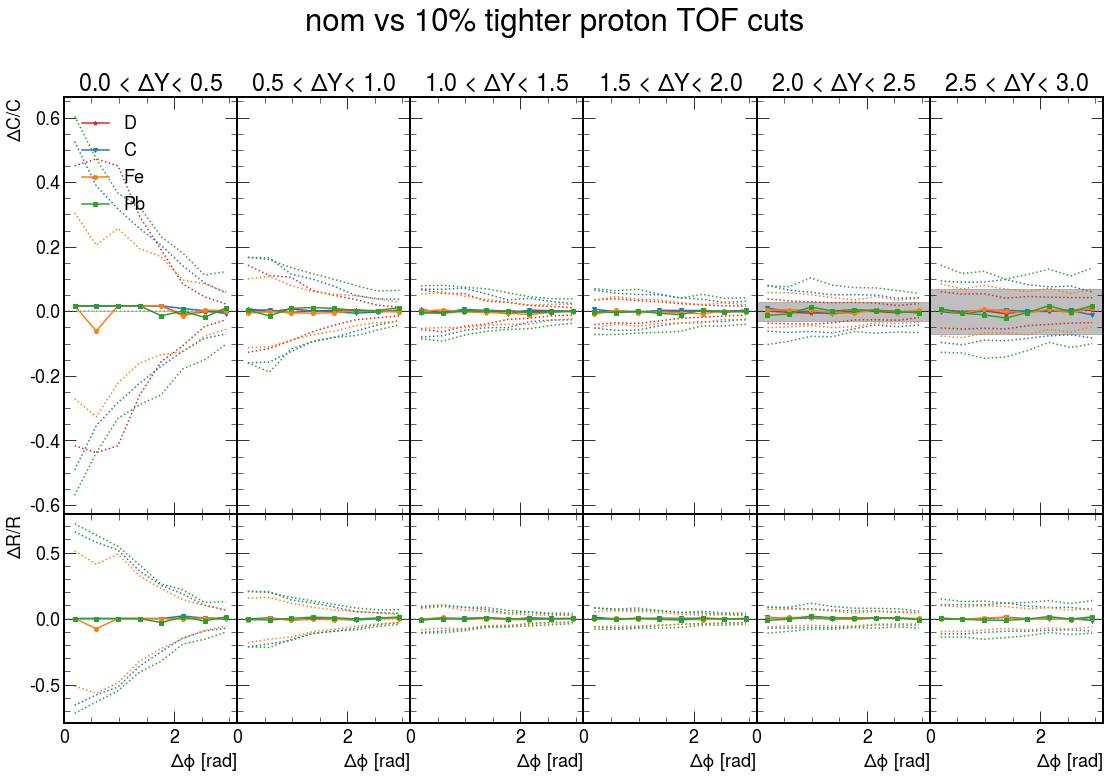

sigmas_nom D [0.48496376 0.7162886  0.92193912 1.2231228  1.50324814 1.59609093]
sigmas_nom C [0.8374599  0.96334617 1.20302034 1.36560082 1.52778383 1.64264535]
sigmas_nom Fe [0.95923667 1.1183369  1.30622811 1.45447874 1.58176713 1.64009281]
sigmas_nom Pb [1.00788624 1.19541286 1.35812006 1.49416468 1.58880239 1.71379117]


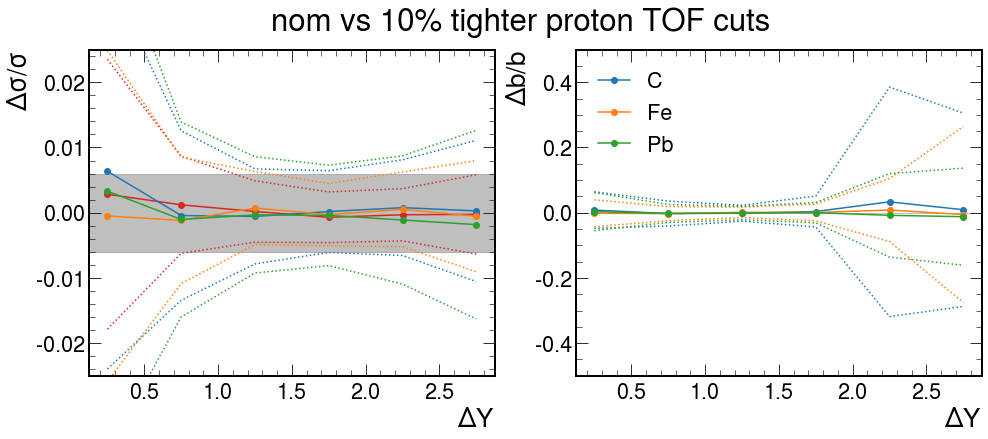

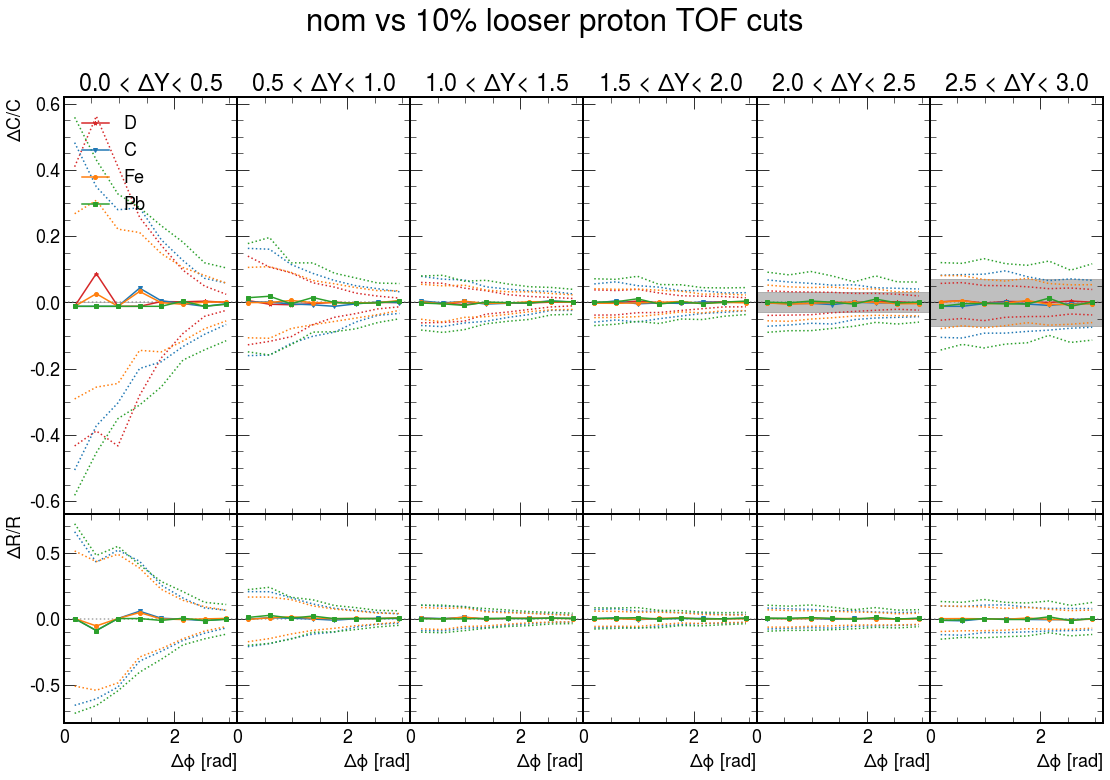

sigmas_nom D [0.48496376 0.7162886  0.92193912 1.2231228  1.50324814 1.59609093]
sigmas_nom C [0.8374599  0.96334617 1.20302034 1.36560082 1.52778383 1.64264535]
sigmas_nom Fe [0.95923667 1.1183369  1.30622811 1.45447874 1.58176713 1.64009281]
sigmas_nom Pb [1.00788624 1.19541286 1.35812006 1.49416468 1.58880239 1.71379117]


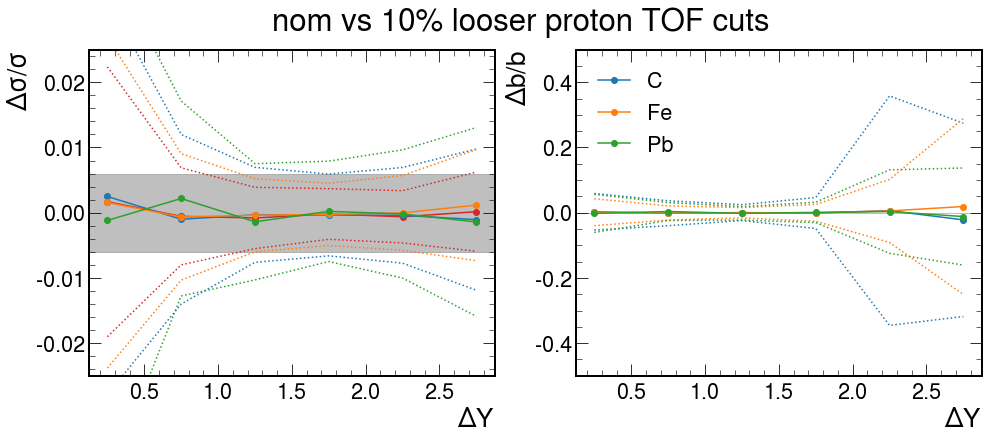

In [171]:
#data, GiBUU, sliceinfo = get_values("drap", "\Delta Y", np.linspace(0,3, 6),GiBUU_suffix=None)
for tightness in "tight", "loose":
    nom, _, sliceinfo = get_values("drap_corr", "\Delta Y", np.linspace(0.0,3.0, 7), pT2min=0.07, pT1min=0.07, pMin=0.350)
    alt, _, sliceinfo = get_values("drap_corr", "\Delta Y", np.linspace(0.0,3.0, 7), pT2min=0.07, pT1min=0.07, pMin=0.350, tofCutTightness=tightness)
    nom = normalize(nom)
    alt = normalize(alt)
    
    make_diff_plots(nom,alt, sliceinfo, filename_tag="all", 
                    suptitle =f"nom vs 10% {tightness}er proton TOF cuts\n\n\n\n  ".replace("ee","e"),
                   tag=f"TOF_{tightness}er_cuts".replace("ee","e"))
    widths_cuts_syst_plot(nom, alt, title =f"nom vs 10% {tightness}er proton TOF cuts".replace("ee","e"),
                          tag=f"TOF_{tightness}er_cuts".replace("ee","e"))

large deviation in corr target D bin 4; z=0.6148180242386659
large deviation in corr target D bin 5; z=1.1557773907902886
large deviation in corr target C bin 5; z=0.5986330004347347
large deviation in corr target Fe bin 5; z=0.7083155991855214
large deviation in corr target Pb bin 5; z=0.39597344867571105


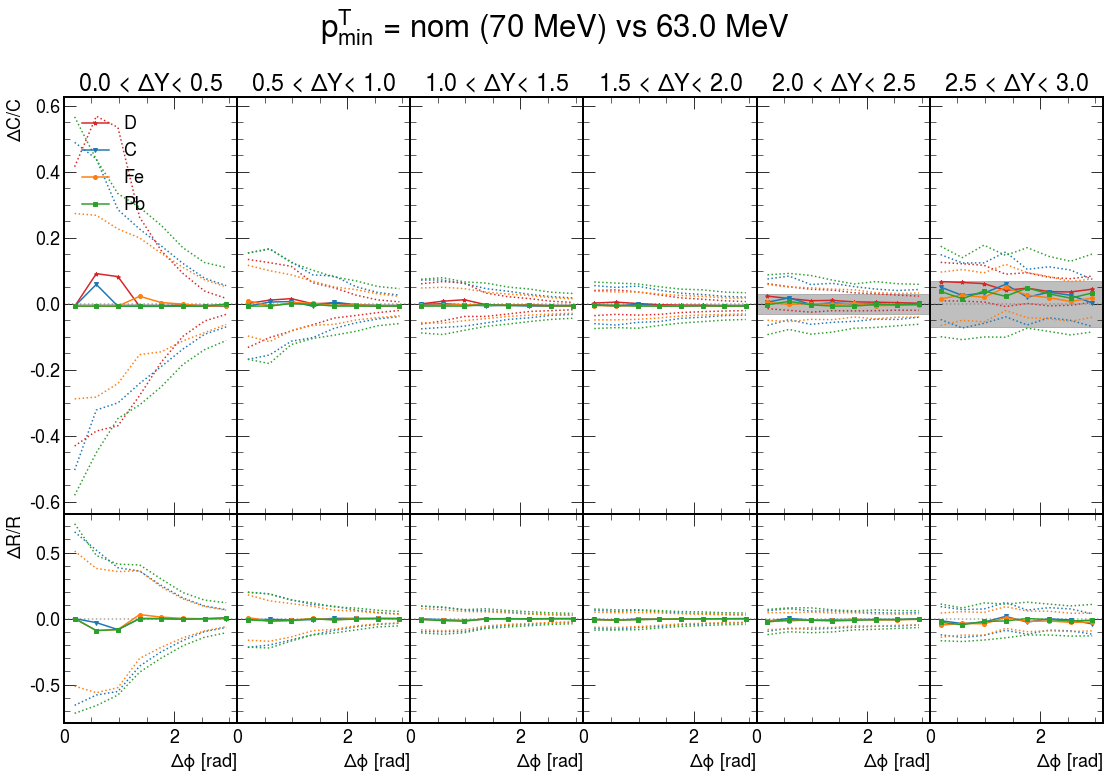

sigmas_nom D [0.48496376 0.7162886  0.92193912 1.2231228  1.50324814 1.59609093]
sigmas_nom C [0.8374599  0.96334617 1.20302034 1.36560082 1.52778383 1.64264535]
sigmas_nom Fe [0.95923667 1.1183369  1.30622811 1.45447874 1.58176713 1.64009281]
sigmas_nom Pb [1.00788624 1.19541286 1.35812006 1.49416468 1.58880239 1.71379117]
large deviation in corr target D bin 0; z=0.3041060956166252
large deviation in corr target D bin 1; z=0.5531558256513247
large deviation in corr target D bin 2; z=0.6683301380981761
large deviation in corr target C bin 2; z=0.3031038657910834
large deviation in corr target Fe bin 2; z=0.30470433917725176
large deviation in corr target D bin 3; z=0.47087287423475166
large deviation in ratio target Fe bin 4; z=0.37425833510215445
large deviation in ratio target C bin 5; z=0.31379206175610724
large deviation in ratio target Fe bin 5; z=0.5325804896817447
large deviation in ratio target Pb bin 5; z=0.3280304407375088


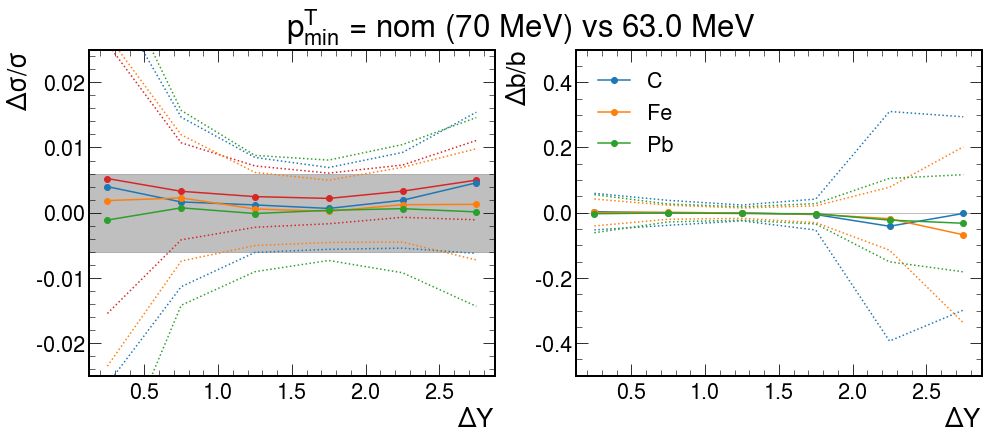

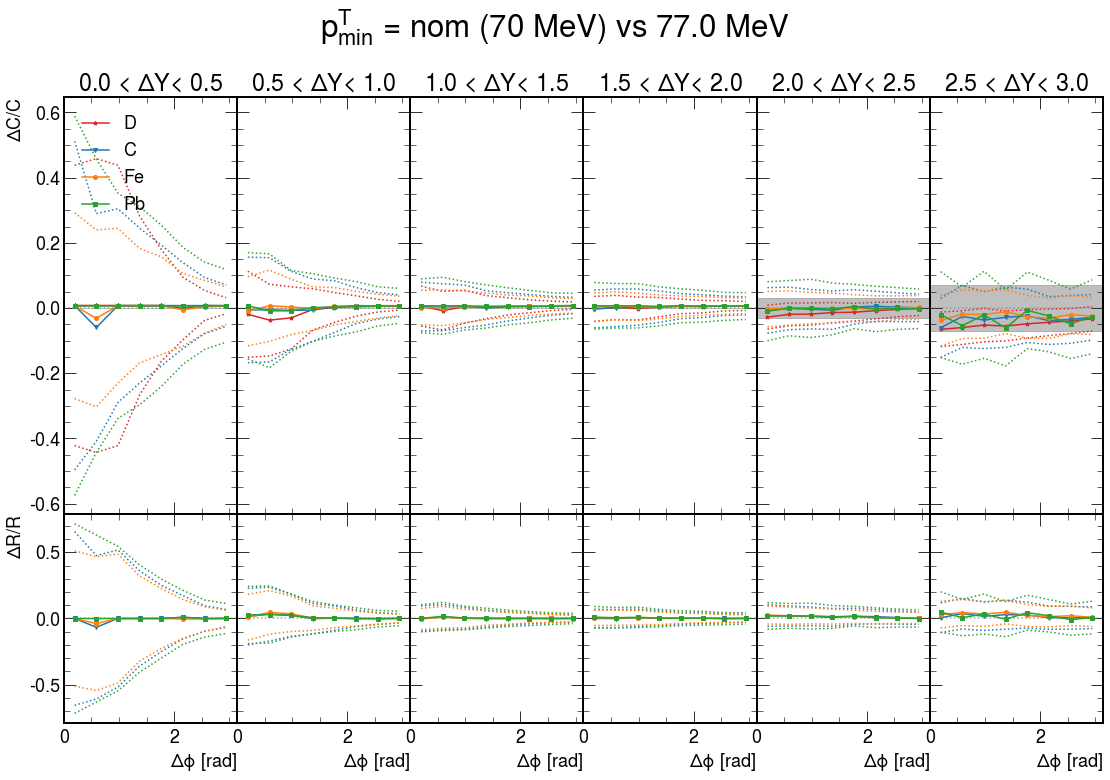

sigmas_nom D [0.48496376 0.7162886  0.92193912 1.2231228  1.50324814 1.59609093]
sigmas_nom C [0.8374599  0.96334617 1.20302034 1.36560082 1.52778383 1.64264535]
sigmas_nom Fe [0.95923667 1.1183369  1.30622811 1.45447874 1.58176713 1.64009281]
sigmas_nom Pb [1.00788624 1.19541286 1.35812006 1.49416468 1.58880239 1.71379117]


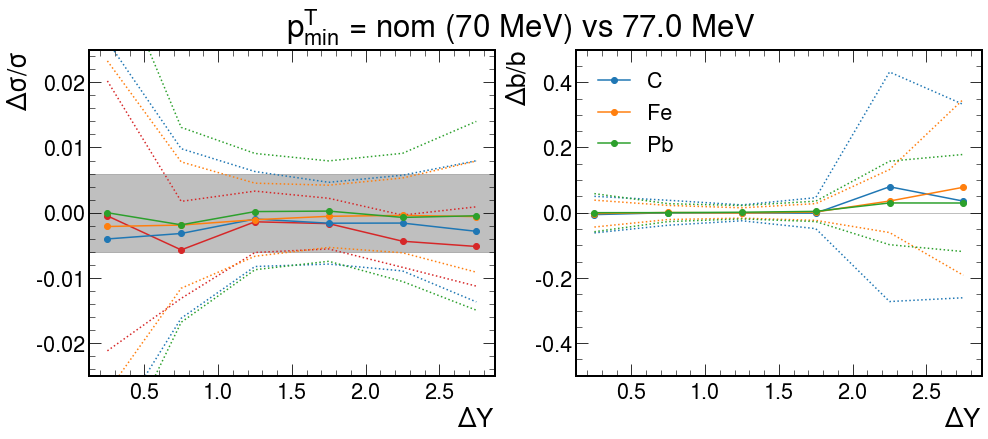

In [172]:
for pTmin in 0.063, 0.077:
    nom, _, sliceinfo = get_values("drap_corr", "\Delta Y", np.linspace(0.0,3.0, 7), pMin=0.350)
    alt, _, sliceinfo = get_values("drap_corr", "\Delta Y",np.linspace(0.0,3.0, 7), pT2min=pTmin, pT1min=pTmin, pMin=0.350)
    nom = normalize(nom)
    alt = normalize(alt)
    make_diff_plots(nom,alt, sliceinfo, filename_tag="dY", suptitle=f"$p^T_{{\\rm min}}$ = nom (70 MeV) vs {pTmin*1000} MeV",
                   tag=f"ptmin_{pTmin*1000:.0f}")
    
    widths_cuts_syst_plot(nom, alt, title =f"$p^T_{{\\rm min}}$ = nom (70 MeV) vs {pTmin*1000} MeV", tag=f"ptmin_{pTmin*1000:.0f}")

large deviation in corr target D bin 0; z=0.3093653098526675
large deviation in corr target D bin 1; z=0.5577833384026244
large deviation in corr target D bin 2; z=0.5422209458293761


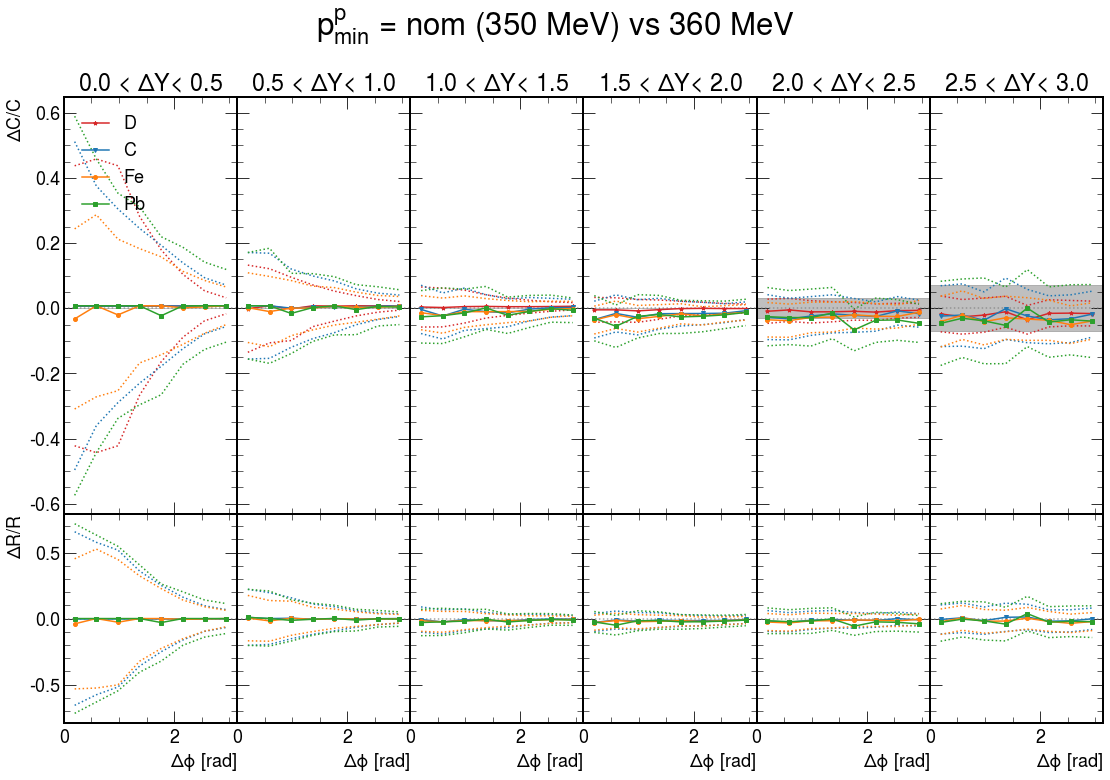

sigmas_nom D [0.48496376 0.7162886  0.92193912 1.2231228  1.50324814 1.59609093]
sigmas_nom C [0.8374599  0.96334617 1.20302034 1.36560082 1.52778383 1.64264535]
sigmas_nom Fe [0.95923667 1.1183369  1.30622811 1.45447874 1.58176713 1.64009281]
sigmas_nom Pb [1.00788624 1.19541286 1.35812006 1.49416468 1.58880239 1.71379117]


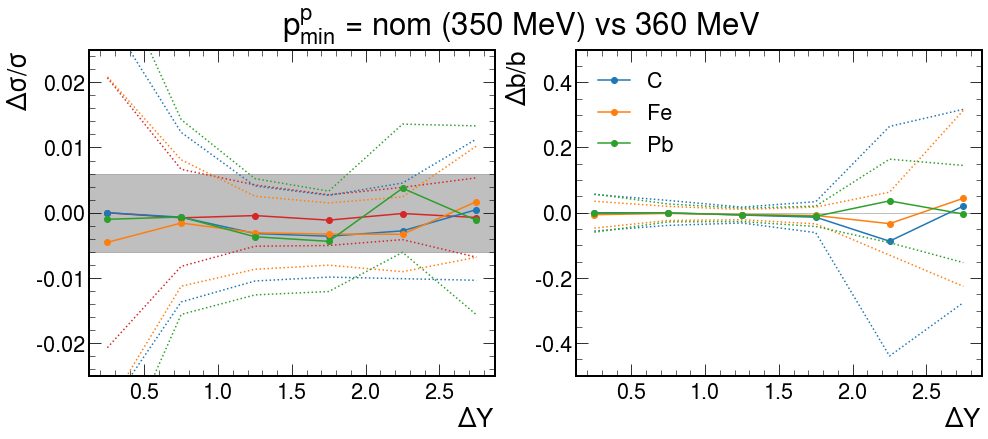

In [173]:

tight=0.360
nom, _, sliceinfo = get_values("drap_corr", "\Delta Y", np.linspace(0,3.0, 7), pT2min=0.07, pT1min=0.07, pMin=0.350)
alt, _, sliceinfo = get_values("drap_corr", "\Delta Y", np.linspace(0,3.0, 7), pT2min=0.07, pT1min=0.07, pMin=tight)
nom = normalize(nom)
alt = normalize(alt)
make_diff_plots(nom,alt, sliceinfo, filename_tag="dY", suptitle=f"$p^p_{{\\rm min}}$ = nom (350 MeV) vs {tight*1000:.0f} MeV",
                   tag=f"pmin_{tight*1000:.0f}")
widths_cuts_syst_plot(nom, alt, title =f"$p^p_{{\\rm min}}$ = nom (350 MeV) vs {tight*1000:.0f} MeV", tag=f"pmin_{tight*1000:.0f}")

(array([[1., 1., 1., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.2002438 , 0.22795209, 0.25566039, 0.28336868, 0.31107698,
        0.33878528, 0.36649357, 0.39420187, 0.42191016, 0.44961846,
        0.47732676, 0.50503505, 0.53274335, 0.56045165, 0.58815994,
        0.61586824, 0.64357653, 0.67128483, 0.69899313, 0.72670142,
        0.75440972, 0.78211801, 0.80982631, 0.83753461, 0.8652429 ,
        0.8929512 , 0.92065949, 0.94836779, 0.97607609, 1.00378438,
        1.03149268, 1.05920098, 1.08690927, 1.11461757, 1.14232586,
        1.17003416, 1.19774246, 1.22545075, 1.25315905, 1.28086734,
        1.30857564, 1.33628394, 1.36399223, 1.39170053, 1.41940882,
        1.44711712, 1.47482542, 1.50253371, 1.53024201, 1.55795031,
        1.5856586 , 1.6133669 , 1.64107519, 1.66878349, 1.69649179,
   

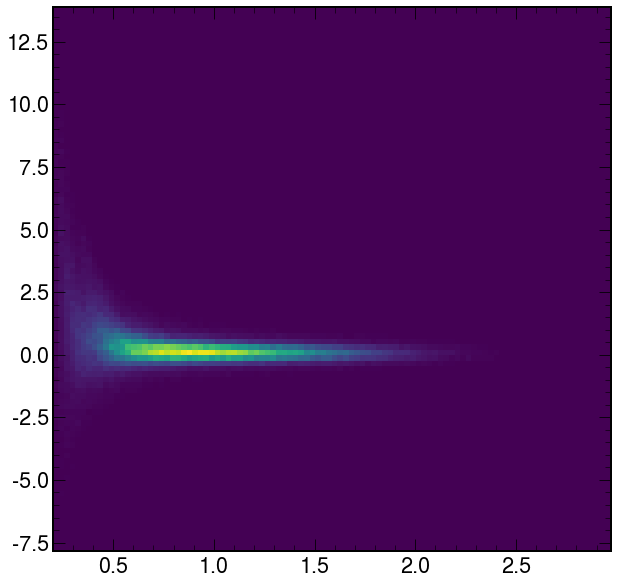

In [99]:
d=dfs_pair["D"].query("h2_T4>-100")
plt.hist2d(d.h2_p,d.h2_T4, bins=100)

In [279]:
for df in dfs_pair.values():
    dphi=df.eval('h1_cm_ph-h2_cm_ph')
    df['signdphi']=np.sign(dphi+(dphi>np.pi)*(-2*np.pi)+(dphi<-np.pi)*(2*np.pi))

In [285]:
import pickle
with open("pion_proton_efficiencies.pkl", "rb") as f:
    d=efficiencies_2d=pickle.load(f)
    #efficiencies_1d=[d["eff1d"]]
    #defficiencies_1d=[d["deff1d"]]
    efficiencies_2d=d["eff2d"]
    defficiencies_2d=d["deff2d"]
import copy
def add_syst_from_mixing(data):
    data=copy.deepcopy(data)
    for j in range(len(data)):
        for A in "D C Fe Pb".split():
            df = data[j][A]
            add_syst=.149
            eff= efficiencies_2d
            #print(len(df.C), len(eff[j]))
            df['C']=df['C']/eff[j]
            df.dCsyst=df.dCsyst/eff[j]
            df['dCsyst_mix']=add_syst*df.C
            df.dCsyst=np.hypot(df.dCsyst, df['dCsyst_mix'])
            
            
    return data


dnewIntegral= 0.0003208009171820609
dnewIntegral= 0.0007418917764969868
dnewIntegral= 0.001378726201205054
dnewIntegral= 0.0015307977697379218
dnewIntegral= 0.0011953325170969335
dnewIntegral= 0.0008396687570085923
dnewIntegral= 0.0002861456645390533
dnewIntegral= 0.0007905826106669278
dnewIntegral= 0.0012707274117248317
dnewIntegral= 0.0015356690248740654
dnewIntegral= 0.001170740696236159
dnewIntegral= 0.000856125650888729


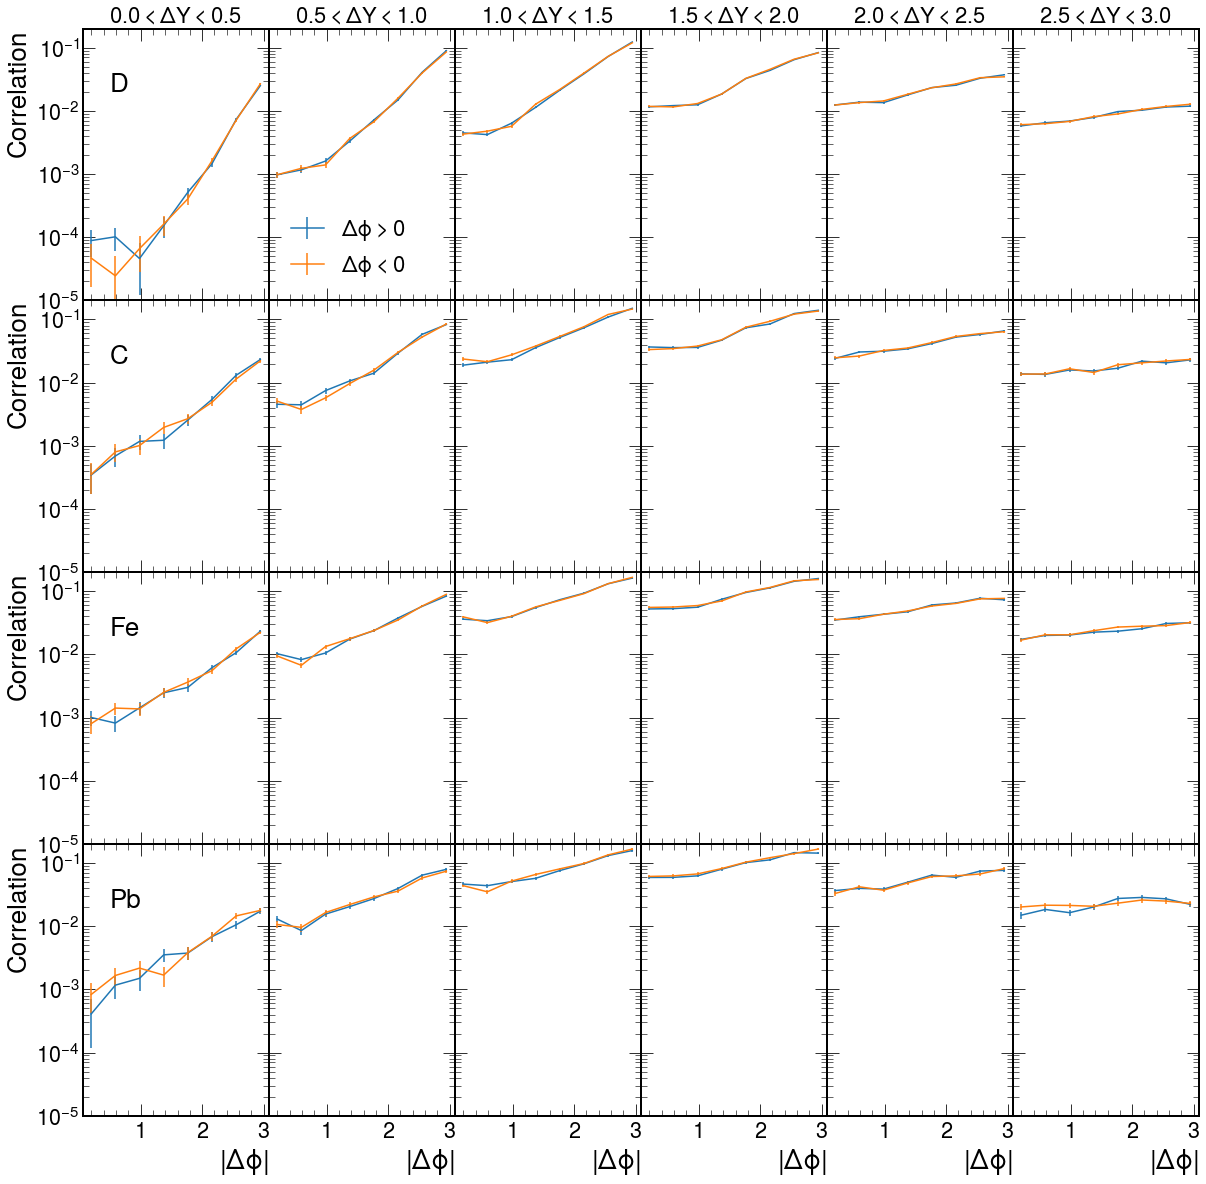

In [288]:
plus, _, sliceinfo = get_values("drap_corr", "\Delta Y", np.linspace(0.0,3.0, 7), addCuts="signdphi==1")
minus, _, sliceinfo = get_values("drap_corr", "\Delta Y", np.linspace(0.0,3.0, 7), addCuts="signdphi==-1")

plus=[apply_endcap_corrections(d) for d in plus]
minus=[apply_endcap_corrections(d) for d in minus]
plus=add_syst_from_mixing(plus)
minus=add_syst_from_mixing(minus)
plus = normalize(plus)
minus = normalize(minus)

fig, axs=plt.subplots(4,6, figsize=(20,20), sharex='all', sharey='all')

axs[0][0].set_ylim(1e-5, 2e-1)

for i in 0,1:
    ds=[plus,minus][i]
    label="$\\Delta\\phi>0$ $\\Delta\\phi<0$".split()[i]
    for j in range(4):
        A="D C Fe Pb".split()[j]
        for k in range(6):
            axs[j][k].errorbar(ds[k][A].phi, ds[k][A].C, ds[k][A].dCstat,label=label)
for i in range(4):
    axs[i][0].set_ylabel("Correlation")
    axs[i][0].text(0.5, axs[i][0].get_ylim()[1]*.1,"D C Fe Pb".split()[i])
    axs[i][0].set_yscale("log")
for j in range(6):
    axs[0][j].set_title(f"${j*.5:.1f}<\\Delta Y<{j*.5+.5:.1f}$", fontsize=22)
    axs[-1][j].set_xlabel("$|\\Delta\\phi|$")


axs[0][1].legend(fontsize=22)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("images/plus_minus.pdf")
plt.show()

chi2=204.9874814985444, ndof=192, chi2/ndof=1.0676431328049187, pval=0.24754814507310163
2.894148925496252 0.003801877953996092 0.5187419685235994


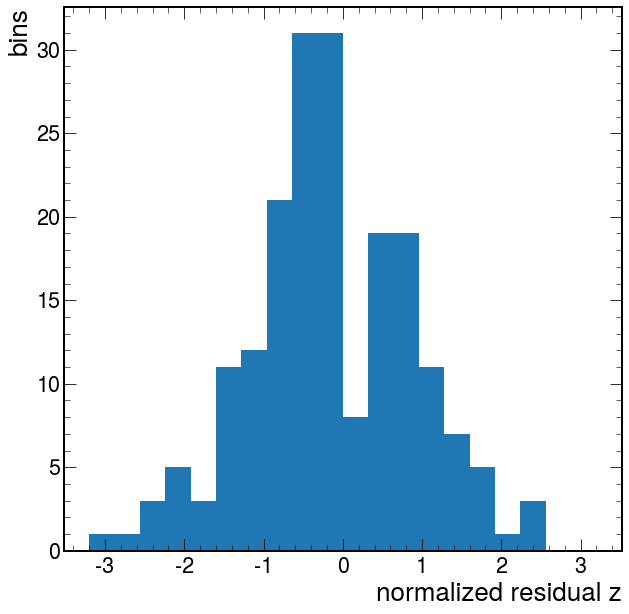

In [289]:
def get_norm_residuals(nom,alt):
    all_stuff=[]
    
    Alist = enumerate("D C Fe Pb".split())
    
    for i, A in Alist:
        for k in range(len(nom)):
            #S = data[k][A].S
            #M = data[k][A].M
            # def dev(nom,alt):
            #     return (alt-nom)/nom
            # def ddev(nom,alt, dnom, dalt):
            #     return alt/nom*np.hypot(dnom/nom, dalt/alt)
            selection=(nom[k][A].dCstat/nom[k][A].C<10000)&( alt[k][A].dCstat/alt[k][A].C<10000)
            all_stuff=np.concatenate([all_stuff, ((nom[k][A].C-alt[k][A].C)/np.sqrt(nom[k][A].dCstat**2+alt[k][A].dCstat**2))[selection]])
    return all_stuff
normalized_residuals=get_norm_residuals(plus, minus)
chi2, ndof=np.sum(normalized_residuals**2),len(normalized_residuals)
plt.hist(normalized_residuals, bins=20, range=(-3.2,3.2))
plt.xlabel("normalized residual z")
plt.ylabel("bins")
plt.savefig("images/norm_resid.pdf")
#plt.plot(normalized_residuals)
from scipy.stats import chi2 as chi2dist
from scipy.stats import norm as normdist

print(f"chi2={chi2}, ndof={ndof}, chi2/ndof={chi2/ndof}, pval={1-chi2dist.cdf(chi2, ndof)}")
print(np.max(np.abs(normalized_residuals)),2*normdist.cdf(-np.max(np.abs(normalized_residuals))),
      1-(1-2*normdist.cdf(-np.max(np.abs(normalized_residuals))))**ndof)

In [29]:
chi2dist.cdf(1000, 10)

1.0

In [264]:
from scipy.stats import norm

In [265]:
1-(1-(2*(1-norm.cdf(2.56))))**(4*8*6)

0.8673839971483077

In [266]:
1-norm.cdf(2.56)

0.005233608163555781

In [267]:
def get_values_time_var(slicevar='drap-ycm', slicevartex='\Delta Y^*', slicebins=(-1,-0.5,0, 0.5, 1,1.5,2),  
               pMin=.2, pT1min=.07, pT2min=.07,
               suptitle=None,nbins_data=8,
              addCuts=None, addCutsTrig=None, sliceNh=False, tofCutTightness="nom"):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    data=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not inves
    systPct=0
    pid=211
    
    integral_data_D = 0
    for k in range(len(slicebins)-1):
        data.append({})
        slice_range=slicebins[k:k+2]

        data_D=None
        stat_D=None
        Alist = enumerate("D_C D_Fe D_Pb".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}   and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid==2212 and h2_p>{pMin} and pass_proton_TOF_cut_{tofCutTightness}"
            
            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCuts is not None:
                q+= f" and {addCuts}"

            which_set=A

            bins = np.linspace(0,np.pi,nbins_data+1)

            N2, x = np.histogram(dfs_pair[A].query(q)['dphi'], bins=bins)
            
            
            qtrig = pThetaCuts_trig+f" and h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            
            if sliceNh:
                qtrig+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCutsTrig is not None:
                qtrig += f" and {addCutsTrig}"
            
            N1 = len(dfs_trigger[A].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            C=S
            dCstat = dSstat
            


            if A=="D":  
                integral_data_D+=sum(C)*dx*2*(slice_range[1]-slice_range[0])

            dCsyst = C*systPct/100

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, dSstat=dSstat,
                                                R=R_data,
                                                dRstat=dR_data_stat, dRsyst=R_data*0.0,
                                        N2h=N2, N1=[N1]*len(N2)))
            data[k][A+"_N1"] = N1
            if "D_" in A:
                continue
        
        
        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.1f} < ${slicevartex}$< {slice_range[1]:.1f}"
            
        else :
            sliceinfo[k] = f""
    #for A in "D C Fe Pb".split():
    #    for k in range(len(slicebins)-1):
    #        data[k][A]['C']/=integral_data_D
    #        data[k][A]['dCstat']/=integral_data_D
    #        data[k][A]['dCsyst']/=integral_data_D
    #data=[apply_endcap_corrections(d) for d in data]
    return data,None, sliceinfo

In [268]:
data, _, sliceinfo=get_values_time_var()

In [269]:
#now run a check if the deuterium values from different run periods were different from one another
Cvals={}
dCvals={}
for A in "C Fe Pb".split():
    Cvals[A]=[]
    dCvals[A]=[]
    
    for i in range(6):
        Cvals[A]=np.concatenate([Cvals[A],data[i][f'D_{A}'].C])
        dCvals[A]=np.concatenate([dCvals[A],data[i][f'D_{A}'].dCstat])

In [270]:
#now take the average
Cvals['combined']=(Cvals['C']/dCvals['C']**2 + Cvals['Fe']/dCvals['Fe']**2 + Cvals['Pb']/dCvals['Pb']**2)/\
                        (1/dCvals['C']**2 + 1/dCvals['Fe']**2 + 1/dCvals['Pb']**2)

2.08061812830598
1.6505934627346588
1.2892926873314747


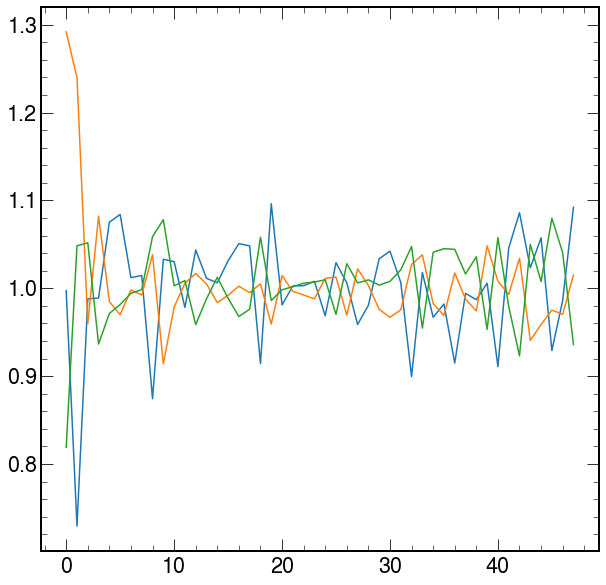

In [271]:
for A in "C Fe Pb".split():
    plt.plot(Cvals[A]/Cvals['combined'])
    print(max((Cvals[A]-Cvals['combined'])/dCvals[A]))

In [152]:
! rm images/cuts_var*.pdf